Using PCA and LDA model
Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5729 - loss: 1.8197 - val_accuracy: 0.9067 - val_loss: 0.3377
Epoch 2/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9822 - loss: 0.1047 - val_accuracy: 0.9200 - val_loss: 0.3320
Epoch 3/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9923 - loss: 0.0479 - val_accuracy: 0.8933 - val_loss: 0.3843
Epoch 4/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9921 - loss: 0.0409 - val_accuracy: 0.9067 - val_loss: 0.3822
Epoch 5/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9950 - loss: 0.0228 - val_accuracy: 0.9200 - val_loss: 0.3716
Epoch 6/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9956 - loss: 0.0168 - val_accuracy: 0.9067 - val_loss: 0.3718
Epoch 7/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9961 - loss: 0.0148 - val_accuracy: 0.8933 - val_loss: 0.4505
Epoch 8/50
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9964 - loss: 0.0138 - val_accuracy: 0.9200 - val_

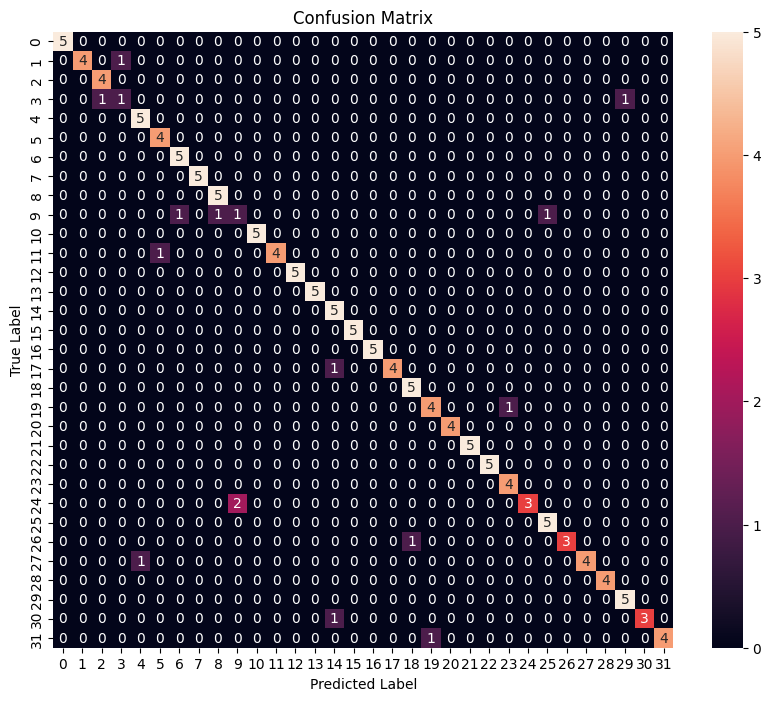

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.80      1.00      0.89         4
           3       0.50      0.33      0.40         3
           4       0.83      1.00      0.91         5
           5       0.80      1.00      0.89         4
           6       0.83      1.00      0.91         5
           7       1.00      1.00      1.00         5
           8       0.83      1.00      0.91         5
           9       0.33      0.25      0.29         4
          10       1.00      1.00      1.00         5
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       0.71      1.00      0.83         5
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         5
          17       1.00    

In [23]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score


resolution = 80
variance = 95
data_dir = f'dimension_reduced_data_{resolution}_res_{variance}_var'
use_pca = True
use_lda = True

# Load the appropriate data
if use_pca and not use_lda:
    print('Using PCA model')
    X_train = np.load(f'{data_dir}/X_train_pca.npy')
    X_val = np.load(f'{data_dir}/X_val_pca.npy')
elif use_lda and not use_pca:
    print('Using LDA model')
    X_train = np.load(f'{data_dir}/X_train_lda.npy')
    X_val = np.load(f'{data_dir}/X_val_lda.npy')
elif use_pca and use_lda:
    print('Using PCA and LDA model')
    X_train = np.load(f'{data_dir}/X_train_pca_lda.npy')
    X_val = np.load(f'{data_dir}/X_val_pca_lda.npy')

y_train = np.load(f'{data_dir}/y_train.npy')
y_val = np.load(f'{data_dir}/y_val.npy')

original_y_train = y_train
original_y_val = y_val

# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_val = lb.transform(y_val)

# Define a simple neural network model
model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)



yp_train = model.predict(X_train)
yp_train = np.argmax(yp_train, axis=1)

yp_val = model.predict(X_val)
yp_val = np.argmax(yp_val, axis=1)

# Calculate accuracy
training_accuracy = accuracy_score(original_y_train, yp_train)
validation_accuracy = accuracy_score(original_y_val, yp_val)

# Print accuracy scores
print(f"Training Accuracy: {training_accuracy}")
print(f"Validation Accuracy: {validation_accuracy}")




# Evaluate the model
predictions = model.predict(X_val)
predictions = np.argmax(predictions, axis=1)
y_val_argmax = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_val_argmax, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Print the classification report
print(classification_report(y_val_argmax, predictions))
